In [1]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train, x_test = x_train/ 255.0, x_test/255.0

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2957 - accuracy: 0.9130
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1433 - accuracy: 0.9571
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1072 - accuracy: 0.9674
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0886 - accuracy: 0.9723
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0744 - accuracy: 0.9766


In [8]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 922us/step - loss: 0.0827 - accuracy: 0.9746


[0.08265581727027893, 0.9746000170707703]

In [9]:
print(x_test[:1].shape)
pred_result = model.predict(x_test[:1])
print(pred_result.shape)
print(pred_result)
print(pred_result[0])

(1, 28, 28)
(1, 10)
[[3.14520236e-07 1.25305314e-06 8.25220013e-07 5.56669023e-04
  1.15167244e-10 4.46474431e-08 2.59965638e-12 9.99435723e-01
  9.60898916e-08 5.08073435e-06]]
[3.14520236e-07 1.25305314e-06 8.25220013e-07 5.56669023e-04
 1.15167244e-10 4.46474431e-08 2.59965638e-12 9.99435723e-01
 9.60898916e-08 5.08073435e-06]


In [10]:
import numpy as np

In [11]:
one_pred = pred_result[0]
print(one_pred.sum())

1.0000001


In [12]:
one = np.argmax(one_pred)
print(one)

7


In [13]:
one_pred = pred_result[0]
print(tf.reduce_sum(one_pred))
print(tf.reduce_sum(one_pred).numpy())

print(tf.argmax(one_pred).numpy())

tf.Tensor(1.0, shape=(), dtype=float32)
1.0
7


In [14]:
import numpy as np

print(np.argmax([5,4,10,1,2]))
print(np.argmax([3,1,4,9,6,7,2]))
print(np.argmax([[0.1, 0.8, 0.1], [0.7, 0.2, 0.1], [0.2, 0.1, 0.7]], axis=1))

2
3
[1 0 2]


In [15]:
print(tf.argmax([5,4,10,1,2]))
print(tf.argmax([3,1,4,9,6,7,2]))
print(tf.argmax([[0.1, 0.8, 0.1], [0.7, 0.2, 0.1], [0.2, 0.1, 0.7]], axis=1))

tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor([1 0 2], shape=(3,), dtype=int64)


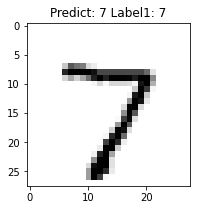

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize = (5,3))
tmp = "Predict: " + str(one) + " Label1: " + str(y_test[0])
plt.title(tmp)
plt.imshow(x_test[0], cmap='Greys')

In [17]:
#flatten

x = np.array([2, 3, 254, 5, 6, 3])
x = x / 255.0
print(x)

x = x.reshape(2,3)
print(x)

x = x.flatten()
print(x)

[0.00784314 0.01176471 0.99607843 0.01960784 0.02352941 0.01176471]
[[0.00784314 0.01176471 0.99607843]
 [0.01960784 0.02352941 0.01176471]]
[0.00784314 0.01176471 0.99607843 0.01960784 0.02352941 0.01176471]


In [18]:
data = np.arange(1,11).reshape(5,2).astype(np.float32)
print(data)
np.sum(data)

[[ 1.  2.]
 [ 3.  4.]
 [ 5.  6.]
 [ 7.  8.]
 [ 9. 10.]]


55.0

In [19]:
tf.random.set_seed(0)
layer = tf.keras.layers.Dropout(.3,input_shape=(2,))
outputs = layer(data, training=True)
print(outputs)
np.sum(outputs)

tf.Tensor(
[[ 0.         0.       ]
 [ 4.285714   5.714286 ]
 [ 7.1428576  8.571428 ]
 [10.        11.428572 ]
 [12.857143   0.       ]], shape=(5, 2), dtype=float32)


60.0

In [20]:
from random import sample

pred_result = model.predict(x_test)
print(pred_result.shape)
print(pred_result[0])
print(np.argmax(pred_result[0]))

pred_labels = np.argmax(pred_result, axis=1)
print(pred_labels)
print(y_test)

(10000, 10)
[3.1451995e-07 1.2530519e-06 8.2522155e-07 5.5666850e-04 1.1516681e-10
 4.4647358e-08 2.5996516e-12 9.9943572e-01 9.6089899e-08 5.0807248e-06]
7
[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


In [21]:
nrows, ncols = 5, 4
samples = sorted(sample(range(len(x_test)),nrows * ncols))

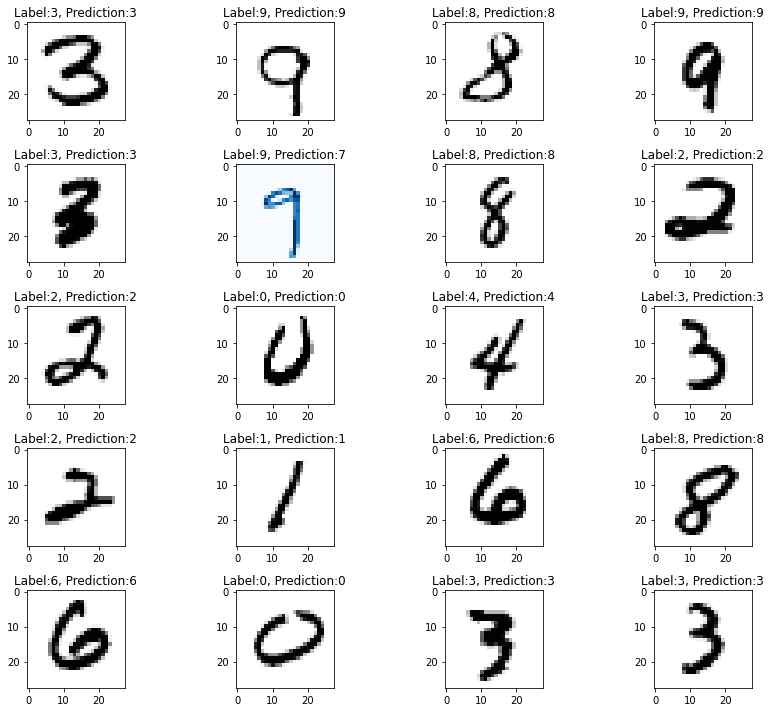

In [23]:
count = 0
plt.figure(figsize=(12,10))
for n in samples:
  count += 1
  plt.subplot(nrows, ncols, count)
  cmap = 'Greys' if (pred_labels[n] == y_test[n]) else 'Blues'
  plt.imshow(x_test[n].reshape(28,28), cmap = cmap, interpolation='nearest')
  tmp = "Label:" + str(y_test[n]) + ", Prediction:" + str(pred_labels[n])
  plt.title(tmp)

plt.tight_layout()
plt.show()

정답이 틀린 수 254
<bound method Random.sample of <random.Random object at 0x297ea18>>


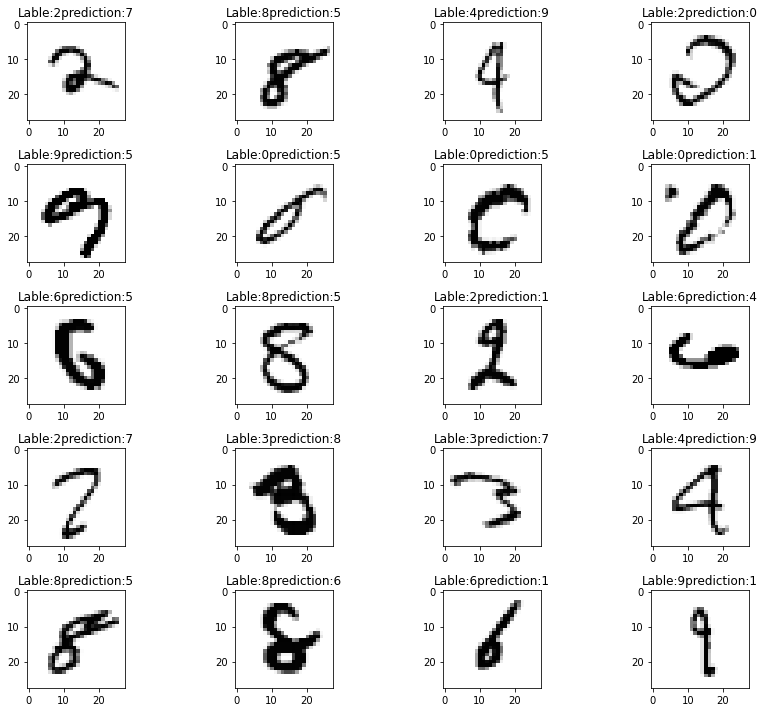

In [27]:
mispred = []

for n in range(0, len(y_test)):
  if pred_labels[n] != y_test[n]:
    mispred.append(n)
print('정답이 틀린 수', len(mispred))

samples = sample(mispred, 20)
print(sample)

count = 0
nrows, ncols = 5,4
plt.figure(figsize=(12,10))
for n in samples:
  count += 1
  plt.subplot(nrows, ncols, count)
  plt.imshow(x_test[n].reshape(28,28), cmap='Greys', interpolation="nearest")
  tmp = "Lable:"+ str(y_test[n]) + "prediction:" + str(pred_labels[n])
  plt.title(tmp)

plt.tight_layout()
plt.show()

In [33]:
model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(28,28)),
      tf.keras.layers.Dense(128,activation='relu'),
      tf.keras.layers.Dropout(.2),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dropout(.2),
      tf.keras.layers.Dense(10, activation='softmax')
])

In [34]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

model.fit(x_train, y_train, epochs=20)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
________________________________________________

In [35]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0845 - accuracy: 0.9809


[0.0844968631863594, 0.98089998960495]

In [41]:
x_train = x_train.reshape((60000, 28*28))
x_test = x_test.reshape((10000, 28*28))

model = tf.keras.Sequential([
      tf.keras.layers.Dense(128, activation='relu', input_shape = (28*28,)),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(10, activation='softmax')
])

In [42]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [47]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2987 - accuracy: 0.9131
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1458 - accuracy: 0.9565
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1078 - accuracy: 0.9672
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0881 - accuracy: 0.9729
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0764 - accuracy: 0.9762


In [48]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0763 - accuracy: 0.9762


[0.07629268616437912, 0.9761999845504761]